### Type of Missing values
#### Missing Completely at Random, MCAR:
When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset.
#### Missing Data Not At Random, MNAR: 
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

### All the techniques of handling , missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

#### Mean/Median/Mode Imputation
* Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

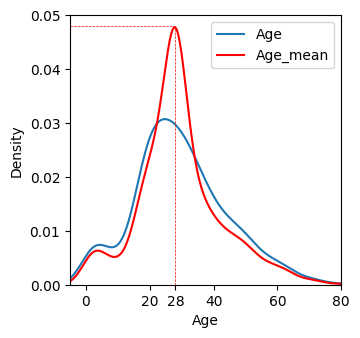

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

def median_imputer(df,fet,median): #create a new column with NULL = Median of rest of entries
    df[fet+'_mean'] = df[fet].fillna(median)

data = pd.read_csv('data/titanic.csv',usecols=['Age','Survived'])
median_imputer(data,'Age',data.Age.median())

#graph plotting
plt.figure(figsize=(3.5,3.5))
data['Age'].plot(kind='kde',label='Age')
data['Age_mean'].plot(kind='kde',color='r',label='Age_mean')
plt.xticks([i for i in range(0,100,20)]+[28])
plt.plot([28,28],[0,0.048],'r--',linewidth=0.5)
plt.plot([-5,28],[0.048,0.048],'r--',linewidth=0.5)
plt.xlabel('Age',fontsize=10)
plt.ylim(0,0.05)
plt.xlim(-5,80)
plt.legend()
plt.show()

##### Advantages
~ Easy to implement(Robust to outliers)<br>
~ Faster way to obtain the complete dataset <br>
##### Disadvantages
~ Change or Distortion in the original variance (see graph)<br>
~ Impacts Correlation

#### Random Sample Imputation
* We simply replace null/nan with any random samples value

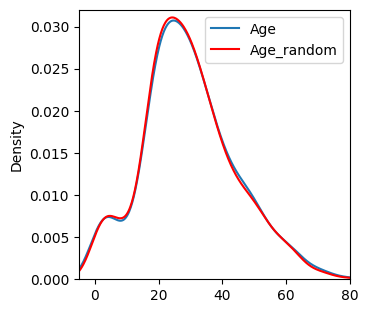

In [2]:
data = pd.read_csv('data/titanic.csv',usecols=['Age','Survived'])
def random_sample_imputation(df,fet):
    df[fet+"_random"] = df[fet]
    
    #### Creating Random Values from dataset ####
    total_null = df[fet].isnull().sum()
    random_sample = df[fet].dropna().sample(total_null,random_state=42)#dropna() is to avoid using 'nan' again by sample() function
    
    #### Alloting random_sample same index as nulls ####
    random_sample.index = df[df[fet].isnull()].index
    df[fet+'_random'] = df[fet].fillna(random_sample)

random_sample_imputation(data,'Age')
data.head()

#graph plotting
plt.figure(figsize=(3.5,3.5))
data['Age'].plot(kind='kde',label='Age')
data['Age_random'].plot(kind='kde',color='r',label='Age_random')
plt.xticks([i for i in range(0,100,20)])
plt.legend()
plt.ylim(0,0.032)
plt.xlim(-5,80)
plt.show()

##### Advantages
~ Easy to implement<br>
~ Close to NO Distortion in variance (see graph) <br>
##### Disadvantages
~ Can't Implement in all cases<br>

#### Capturing NAN values with a new feature
* Recomended for data missing not at random
* Idea is to fill nan val with mean/median and add additional feature to give weight to that instance with missing feature value

In [3]:
import numpy as np

data = pd.read_csv('data/titanic.csv',usecols=['Age','Survived'])

#this will add feature with 1 for instances with missing age values and else 0
data['Age_nan'] = np.where(data['Age'].isnull(),1,0)

data['Age'].fillna(data.Age.median)
data.head(2)

,Survived,Age,Age_nan
0,0,22.0,0
1,1,38.0,0


##### Advantages
~ Easy to implement<br>
~ Capture the importance of missing values
##### Disadvantages
~ Create additional feature <i>(Curse of dimensionality)</i>

#### End of Distribution imputation
* We fill nan with extream value that is after 3rd standard deviation 

In [4]:
data = pd.read_csv('data/titanic.csv',usecols=['Age','Survived'])

def end_of_distribution_imputation(df,fet,extream):
    df[fet+"_end_of_distribution"] = df[fet].fillna(extream)

extream = data.Age.mean() + 3 * data.Age.std()
end_of_distribution_imputation(data,'Age',extream)
data.head(2)

,Survived,Age,Age_end_of_distribution
0,0,22.0,22.0
1,1,38.0,38.0


##### Advantages
~ Easy to implement<br>
~ Capture the importance if there is any<br>
~ Handle the outliers
##### Disadvantages
~ Distrots the originbal distribution of feature<br>
~ 

#### Arbitrary Value Imputation
* We replace nan with any of the extream values , like for age it can be 0 or 100

##### Advantages
* Easy to implement
* Captures the importance of missingess if there is one<br>

##### Disadvantages
* Distorts the original distribution of the variable
* If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
* Hard to decide which value to use

#### Frequent Category Imputation 
* We fill the NAN with the most frequent category

In [5]:
data = pd.read_csv('data/housing.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

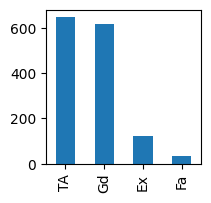

In [6]:
plt.figure(figsize=(2,2))
data['BsmtQual'].value_counts().plot.bar()
plt.show()
# we will chose the most frequent category

In [7]:
def frequent_imputation(df,fet):
    most_frequent_cat = df[fet].value_counts().index[0] # .value_count().index[0] = .mode()[0]
    df[fet].fillna(most_frequent_cat,inplace=True)

In [8]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    frequent_imputation(data,feature)

In [9]:
data.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

##### Advantages
~ Easy to implement
~ No Distortion when NAN values are low (like in 'BsmtQual')
##### Disadvantages
~ High Distortion when NAN are highs (like in 'FireplaceQu')<br><br>
*we can also add additional feature to capture NAN values just like we did before , eg add another feature with 1 for NAN and 0 for not NAN just to signify there was NAN before*<br><br>
*if there are more frequent feature cat , we can consider NAN as a cat. itself (see below)*

In [10]:
def new_fet_imputation(df,fet):
    df[fet+'_new_fet'] = np.where(df[fet].isnull(),'Missing',df[fet])

In [11]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    new_fet_imputation(data,feature)
data.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1,inplace=True)
data.head(3)

,SalePrice,BsmtQual_new_fet,FireplaceQu_new_fet,GarageType_new_fet
0,208500,Gd,Gd,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd


# Handling Categorical Features

#### One-Hot Encoding
* We can do standard OneHotEncoding in less no of cat but when there are too many we might take top 10 most frequent cat.

In [12]:
data = pd.read_csv('data/Mercedes.csv',usecols=['X'+i for i in "0123456"])
len(data['X0'].unique())

47

In [13]:
top_10 = list(data.X0.value_counts().sort_values(ascending=False).index[0:10])

for categories in top_10:
    data[categories]=np.where(data['X1']==categories,1,0)
data.head()
#above code will create 10 new feture with 1 if it points one of the top_10 cat. else 0

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,1,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,1
3,az,t,n,f,d,x,l,0,0,0,0,1,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0


#### Ordinal Number Encoding
Used when we can give ranking to the categories <br>
*example : if we have a column with medal won by player we can encode them to number such as Gold as 1 , silver as 2 and bronze as 3*

In [14]:
import string
player = [i for i in string.ascii_lowercase]
medal_won = np.array(["GSB"[i%3] for i in range(len(player))])
np.random.shuffle(medal_won)
data = pd.DataFrame({'players':player,'medal_won':medal_won})
data.head(2)

,players,medal_won
0,a,B
1,b,G


In [15]:
ordinal_dict = {}
for i in range(0,3):
    ordinal_dict['GSB'[i]] = i+1
data['medal_won_ordinal'] = data['medal_won'].map(ordinal_dict)
data.head(2) 
#NOW WE CAN DROP THE MEADAL_WON COLUMN

,players,medal_won,medal_won_ordinal
0,a,B,3
1,b,G,1


#### Count or Frequency Encodign
Idea it to replace that category with its frequency in dataset<br><br>
*example : if India had occurred 90 time we will replace India with 90*<br><br>
<b>Advantages</b> : no feature-space in increasing<br>
<b> Disadvantges</b> : It will provide same/similar weight to label with same/similar frequency

In [16]:
data = pd.read_csv('data/adult.csv',usecols=['workclass','education','marital-status',
                                            'occupation','relationship','race','native-country'])
data.head(2)

,workclass,education,marital-status,occupation,relationship,race,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States


In [17]:
country_map = data['native-country'].value_counts().to_dict()

In [18]:
data['native-country'] = data['native-country'].map(country_map)
data.head(2)

,workclass,education,marital-status,occupation,relationship,race,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,29170


#### Target guided ordinal Encoding
Ordering the labels according to the target / Replace the labels by the joint probability of being 1 or 0<br><br>
*example : if class A have more probability of survival it will be order heigher*

In [19]:
data = pd.read_csv('data/titanic.csv',usecols=['Cabin','Survived'])
data.Cabin.fillna('Missing',inplace=True)
data['Cabin']=data['Cabin'].astype(str).str[0] # taking only first char as category

In [20]:
cabin = data.groupby(['Cabin'])['Survived'].mean().sort_values() 
#probability of survival on basis of cabin
cabin

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [21]:
cabin_map = {}
for i in range(len(cabin.index)): #cabin.index to get list of cabin name
    cabin_map[cabin.index[i]] = i
data['Cabin'] = data['Cabin'].map(cabin_map)
data.head()

,Survived,Cabin
0,0,1
1,1,4
2,1,1
3,1,4
4,0,1


*we can also replace category with the mean(of its relation with target) itself this is called mean ordinal encoding*

#### Probability Ratio Encoding
It is the ratio of good and bad probabilities for some instances<br><br>
*example : for titanic dataset probability ratio is the ratio of survival and death*

In [25]:
data = pd.read_csv('data/titanic.csv',usecols=['Cabin',"Survived"])
data['Cabin'].fillna('Missing',inplace=True)  # just data cleaning 
data['Cabin'] = data['Cabin'].astype(str).str[0]

In [35]:
survival_prob = data.groupby(['Cabin'])['Survived'].mean().to_dict()
death_prob = {i : 1-survival_prob[i] for i in list(survival_prob.keys())}
prob_ratio = {i : survival_prob[i]/death_prob[i] for i in list(survival_prob.keys())}

In [40]:
data['Probability_Ratio'] = data['Cabin'].map(prob_ratio)
data.head(2)

,Survived,Cabin,Probability_Ratio
0,0,M,0.428274
1,1,C,1.458333
